In [ ]:
n = 3
y_sum = w0 + w1*x1 + w2*x2 + w3*x3
out = step_activation_func(y_sum)

def step_activation_func(a):
  if a >= 0:
    return 1
  else:
    return 0

In [ ]:
actual_y = f(x1, x2, x3)

# Neuron or Perceptron: The foundation of all Deep Learning Networks
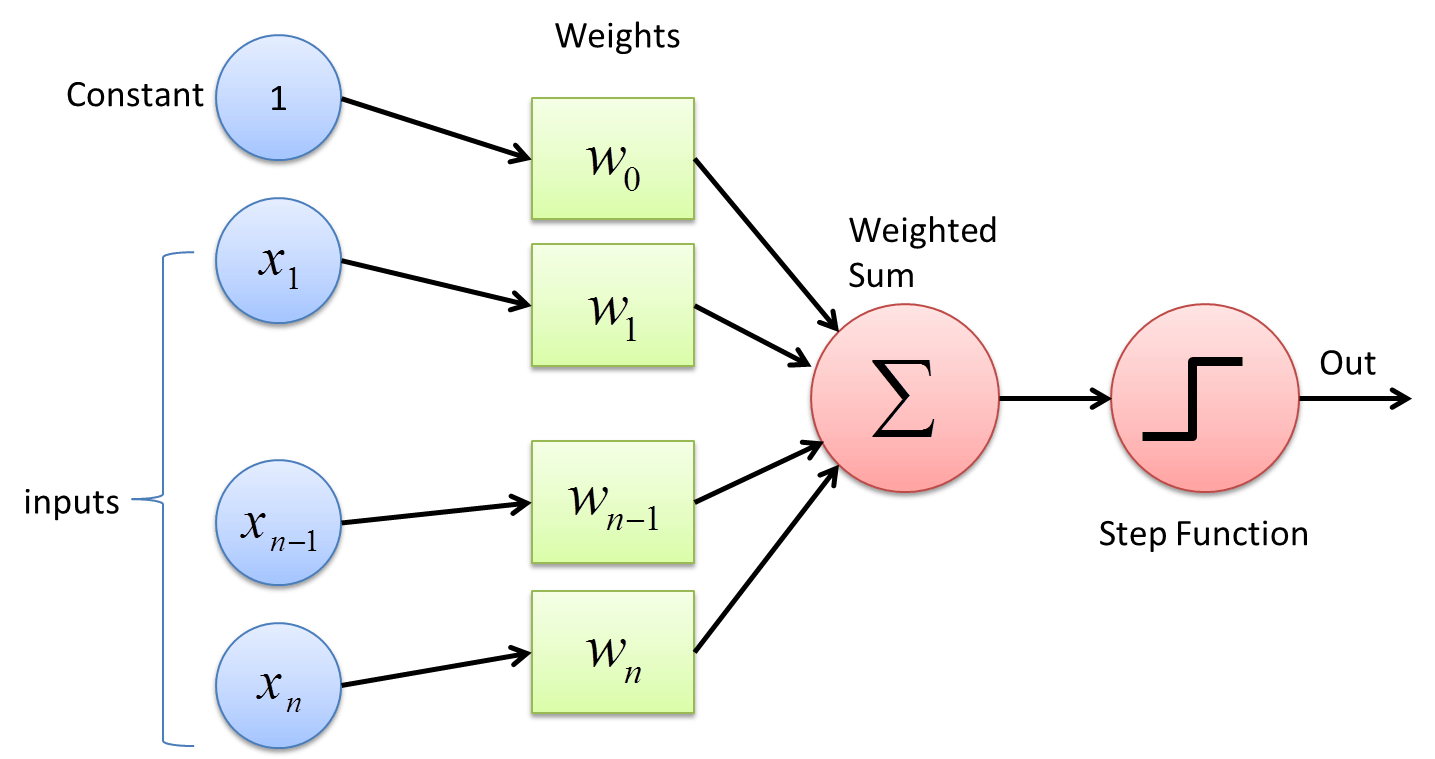

* What it is: In the context of artificial neural networks, a neuron or perceptron is the basic building block. Think of a neuron as a tiny decision-making unit. It takes in some information, processes it, and produces an output. It's like a small decision-making entity.
* Components:
 * Input: Neurons take inputs, which can be values representing features.
 * Weights: Each input has an associated weight, which signifies the importance of that input. Think of it as the strength of a connection between two pieces of information.
 * Bias: Bias is an additional parameter in a model that allows it to make predictions even when all input features are zero. If you were predicting someone's weight based on their height, bias is like a starting point. Even if someone has zero height (which is impossible, but for illustration), there's still a base weight.
 ### **WEIGHTS AND BIASES ARE THE ONLY THINGS THAT ARE UPDATED DURING THE TRAINING PHASE**
* Summation: The neuron adds up the products of inputs and their weights. It's like weighing the importance of different pieces of information before making a decision.
* Activation Function: After summation, the neuron applies an activation function. This function decides whether the neuron should "fire" and produce an output. It's like deciding whether the neuron is activated or not based on the total weighted input.
* Example: If you were deciding whether to go outside based on the weather, your neuron might take inputs like temperature, humidity, and wind speed. Each of these inputs has a weight, signifying their importance. The neuron adds up these weighted inputs, applies a decision rule (activation function), and decides whether it's a good day to go outside.

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the input x1,  x2,  x3
inputs = np.array([0.5, 0.3, 0.2])

# Initialize weights and bias
weights = np.random.rand(len(inputs))
bias = np.random.rand(1)

# Compute the weighted sum of inputs + bias
total_input = np.dot(inputs, weights) + bias # y_sum

# Apply the activation function
output = sigmoid(total_input)

print("Output of the neuron:", output)

* Other terms to know about:
    * **Learning Rate:** In the context of machine learning, the learning rate is like the step size that a model takes during training to minimize errors. Imagine you're trying to find the lowest point in a hilly area. The learning rate is how big of steps you take. Too big, and you might overshoot the lowest point; too small, and it might take forever to get there.
    * **Batch Size:** During training, you don't always use all your data at once. Batch size is the number of data points you use in one iteration. If you're learning from a cookbook, a batch size of 1 is like trying a recipe one ingredient at a time, and a batch size of 10 is like trying to cook with ten ingredients at once.
    * **Epoch:** An epoch is one complete pass through the entire training dataset during the training of a model. If you're learning from a book, one epoch is like reading through the entire book from start to finish. Doing it multiple times (multiple epochs) helps you understand the book better.
    * **Layer:** In a neural network, a layer is a fundamental building block that organizes and processes data. It is a grouping of nodes that collectively perform a specific function, whether it's receiving input, extracting features, or producing the final output. The arrangement and connections between these layers enable the network to learn and make predictions based on the input data.
    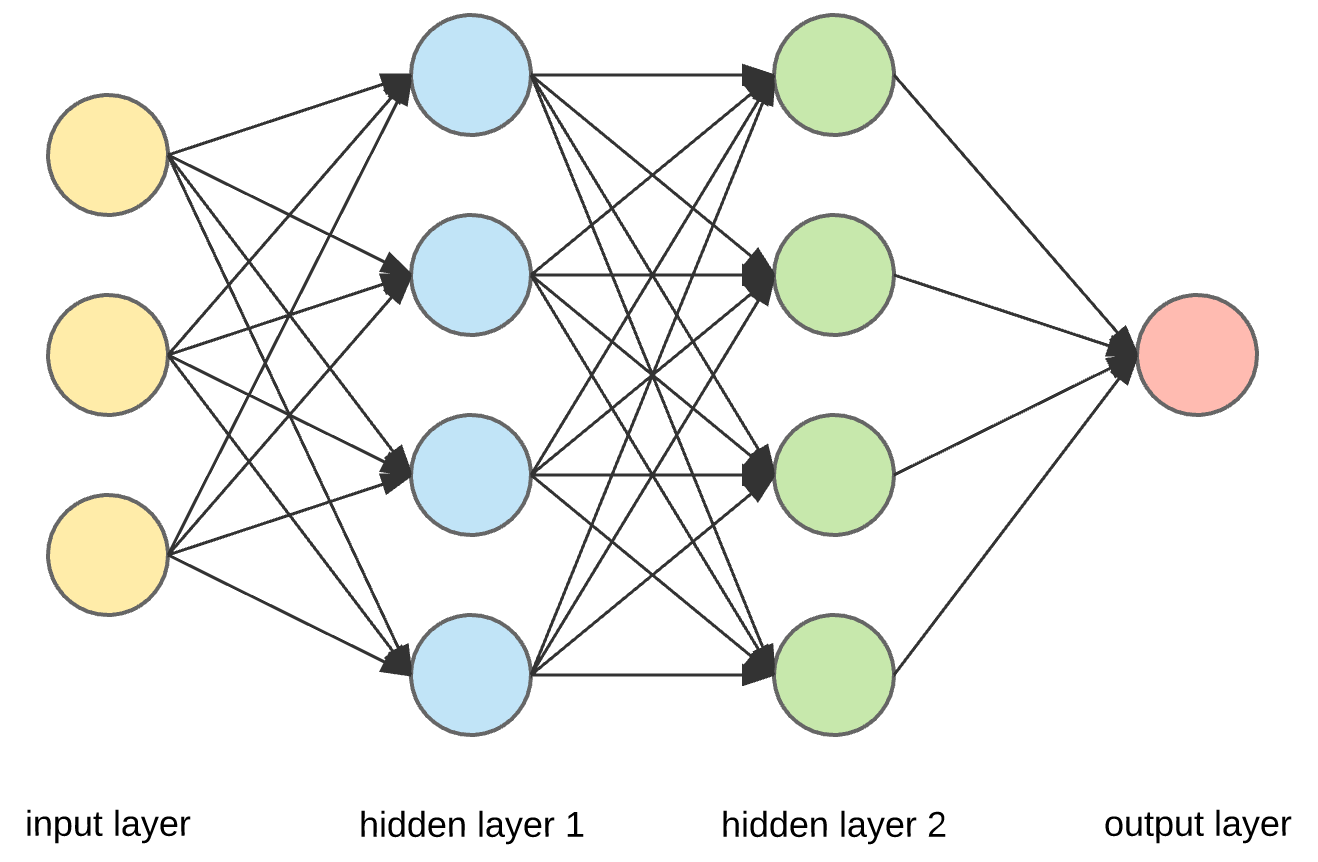
    * **Dense Layer:** In a dense layer, each node in the current layer is connected to every node in the previous layer and every node in the next layer. This means that all the neurons in one layer are densely connected to all the neurons in the adjacent layers.
    * **More Kinds of Layers:** https://keras.io/api/layers/
    * **Loss Function, or Cost Function:** A loss function is a mathematical function that calculates the difference between the predicted output of a machine learning model and the actual target values. It quantifies the error between what your model predicts and what it should predict, DURING THE TRAINING PHASE. You can use the current loss value to correct your models.
    * **Metric:** A metric is a measurement used to evaluate the performance of a machine learning model, AFTER THE TRAINING HAS BEEN COMPLETED. Unlike the loss function, which is used during the training process to guide the model, a metric is a tool for you to assess how well your model is doing after it has been trained.

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the input
inputs = np.array([[0.5, 0.3, 0.2],
                   [0.9, 0.4, 0.7],
                   [0.3, 0.9, 0.5]])

# Define the expected output
expected_output = np.array([[1], [0], [1]])

# Initialize weights and biases
input_layer_neurons = inputs.shape[1]
hidden_layer_neurons = 4
output_neurons = 1

hidden_weights = np.random.rand(input_layer_neurons, hidden_layer_neurons)
hidden_bias = np.random.rand(1, hidden_layer_neurons)
output_weights = np.random.rand(hidden_layer_neurons, output_neurons)
output_bias = np.random.rand(1, output_neurons)

# Learning rate
lr = 0.1

# Training the neural network
for epoch in range(10000):
    # Forward Propagation
    hidden_layer_activation = np.dot(inputs, hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output, output_weights) + output_bias
    predicted_output = sigmoid(output_layer_activation)

    # Compute error/loss
    error = expected_output - predicted_output

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating Weights and Biases
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
    output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * lr
    hidden_weights += inputs.T.dot(d_hidden_layer) * lr
    hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr

print("Final output after training:")
print(predicted_output)

# Activation Functions

## Why are activation functions essential?

* Without activation functions, neural networks would just consist of linear operations like matrix multiplication. All layers would perform linear transformations of the input, and no non-linearities would be introduced.

* Most real-world data is non-linear. For example, relationships between house prices and size, income, and purchases, etc., are non-linear. If neural networks had no activation functions, they would fail to learn the complex non-linear patterns that exist in real-world data.

* Activation functions enable neural networks to learn these non-linear relationships by introducing non-linear behaviors through activation functions. This greatly increases the flexibility and power of neural networks to model complex and nuanced data.

## Types of Activation Functions

### Sigmoid Activation

*It takes a real-valued input and squashes it to a value between 0 and 1. The sigmoid function has an "S"-shaped curve that asymptotes to 0 for large negative numbers and 1 for large positive numbers. The outputs can be easily interpreted as probabilities, which makes it natural for binary classification problems.*

**Mathematical Form:**

```
f(x) = 1 / (1 + e^-x)
```

**Code:**

```
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
```
**Visual:**


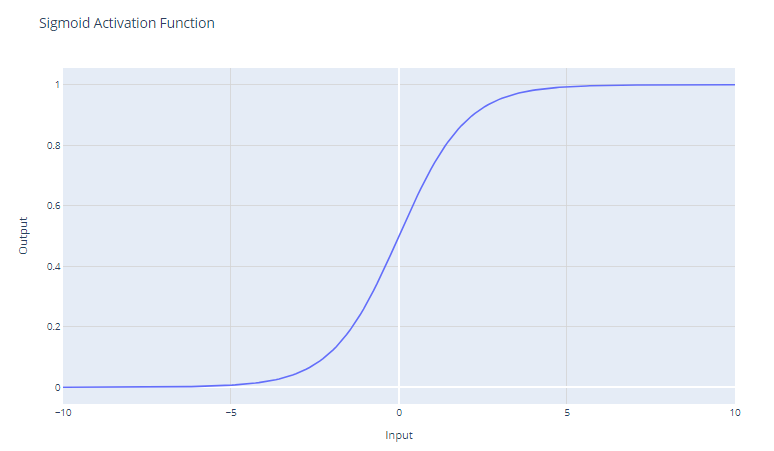

### Rectified Linear Unit (ReLU) Activation

*It thresholds the input at zero, returning 0 for negative values and the input itself for positive values. Even though ReLU is linear for half of its input space, it is technically a non-linear function because it has a non-differentiable point at x=0, where it abruptly changes from x. This non-linearity allows neural networks to learn complex patterns.*

**Mathematical Form:**

```
f(x) = max(0, x)
```

**Code:**

```
def relu(x):
    return np.maximum(0, x)
```

**Visual:**

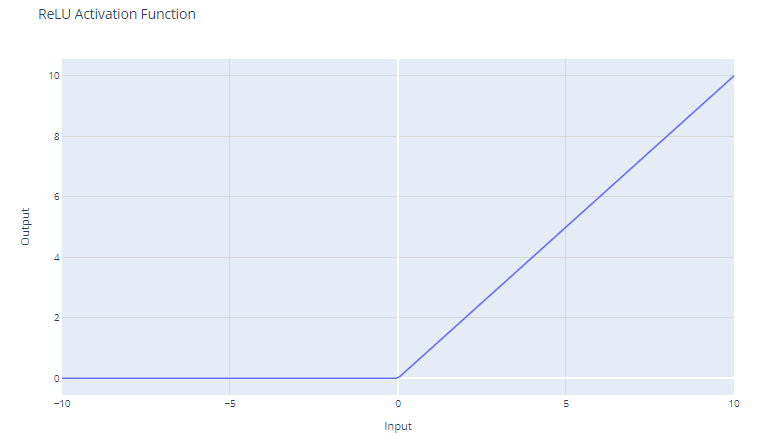



### Softmax Activation
*The softmax activation function, also known as the normalized exponential function, is particularly useful within the context of multi-class classification problems. The output of the softmax function is a probability distribution that sums up to one. Each element of the output represents the probability that the input belongs to a particular class. The use of the exponential function ensures that all output values are non-negative. This is crucial because probabilities cannot be negative.*

**Mathematical Form:**
```
f(xi) = e^xi / Σj e^xj
```

**Code:**
```
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtracting the maximum value for numerical stability
    return exp_x / exp_x.sum(axis=0, keepdims=True)
```

**Visual:**

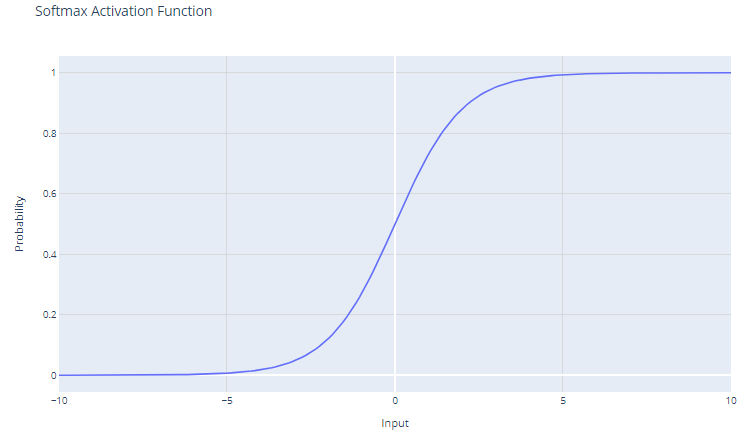


## Activation Functions: Homework


*   What is the vanishing gradient problem? Why does sigmoid function cause it?
*   Why does ReLU function help with the vanishing gradient problem?
*   What is Leaky ReLU function? What was the need for it?
*   Go through: https://keras.io/api/layers/activations/



## Choosing the Right Activation Function
The choice of activation function depends on the type of problem you are trying to solve. Here are some guidelines:

* **For binary classification:**
Use the sigmoid activation function in the output layer. It will squash outputs between 0 and 1, representing probabilities for the two classes.

* **For multi-class classification:**
Use the softmax activation function in the output layer. It will output probability distributions over all classes.

* **If unsure:**
Use the ReLU activation function in the hidden layers. ReLU is the most common default activation function and usually a good choice.

# Loss or Cost Functions

## Why are loss functions essential?

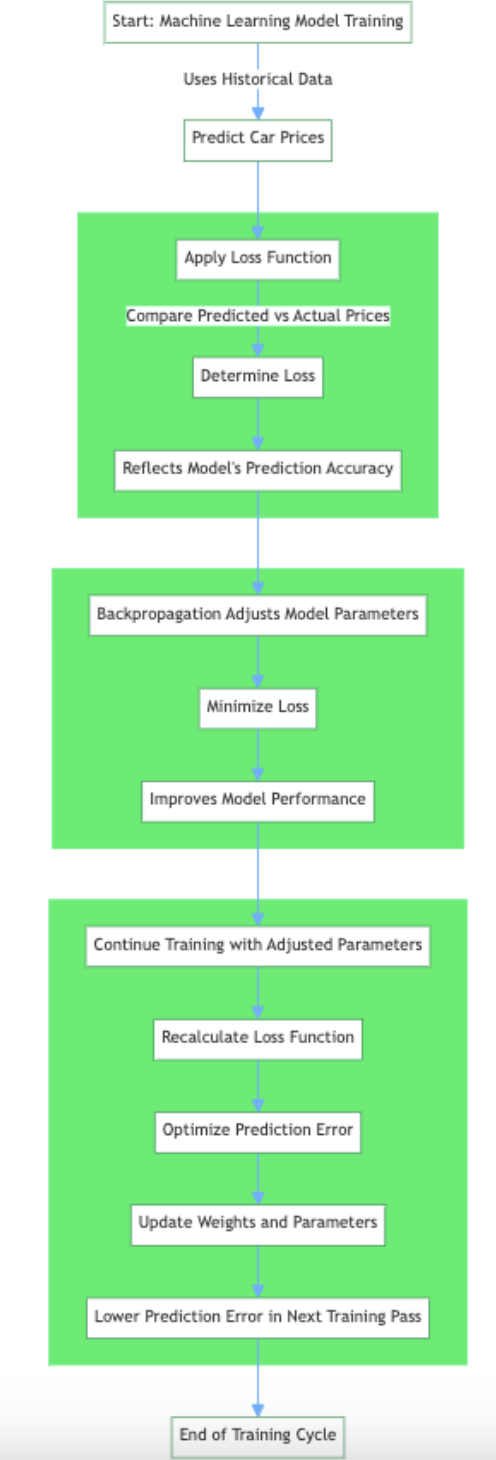

## Regression loss functions
Regression models have continuous output. So, we need a metric based on calculating some sort of distance between predicted and ground truth.

* Mean Absolute Error (MAE),
* Mean Squared Error (MSE),
* Root Mean Squared Error (RMSE),
* R² (R-Squared).


**Mathematical Form:**

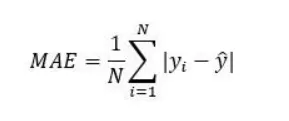

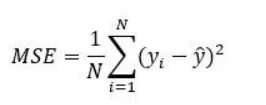

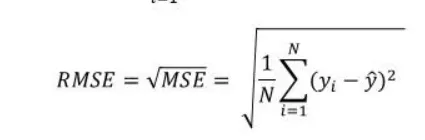

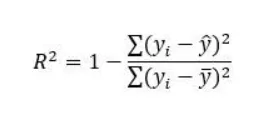





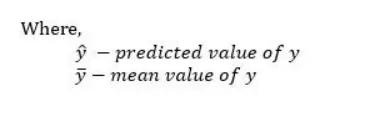

### Loss Functions: Homework
Why the best value of R2 is 1?

**Code:**


```
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R-Squared (R²)
r_squared = r2_score(actual_values, predicted_values)
print("R-Squared (R²):", r_squared)

```



## Classification Loss Functions
* Accuracy
* Cross Entropy

### Loss Functions: Homework
* What is null accuracy?

### CrossEntropy

Binary Cross Entropy Loss (or Log Loss) is a quantification of the difference between the prediction of a machine learning algorithm and the actual target prediction that is calculated from the negative value of the summation of the logarithm value of the probabilities of the predictions made by the machine learning algorithm against the total number of data samples.

```
L(y, f(x)) = -[y * log(f(x)) + (1 - y) * log(1 - f(x))]
```

The BCE loss function penalizes inaccurate predictions, which are predictions that have a significant difference from the positive class or, in other words, have a high quantification of entropy.


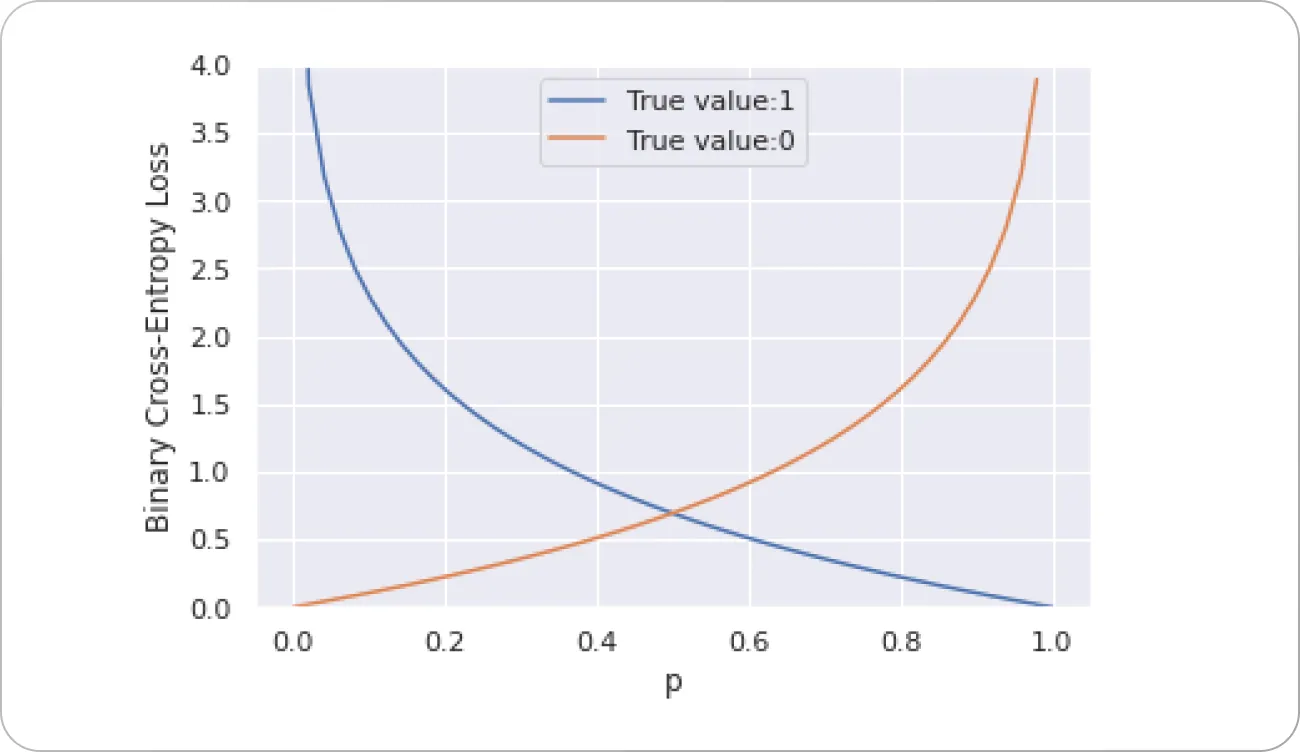

## Optimizers

Optimizers are algorithms or methods used to minimize an error function (loss function). Optimizers are mathematical functions which are dependent on model’s learnable parameters i.e Weights & Biases. Optimizers help to know how to change weights and learning rate of neural network to reduce the losses.

### Gradient Descent



```
θ = θ − α∇J(θ)

Where:

θ represents the parameters (weights) of the model,
α is the learning rate, a hyperparameter that determines the size of the step taken during each iteration,
J(θ) is the cost function, a measure of the difference between the predicted values and the actual values,
∇J(θ) is the gradient of the cost function with respect to the parameters θ, representing the direction of the steepest ascent.

```

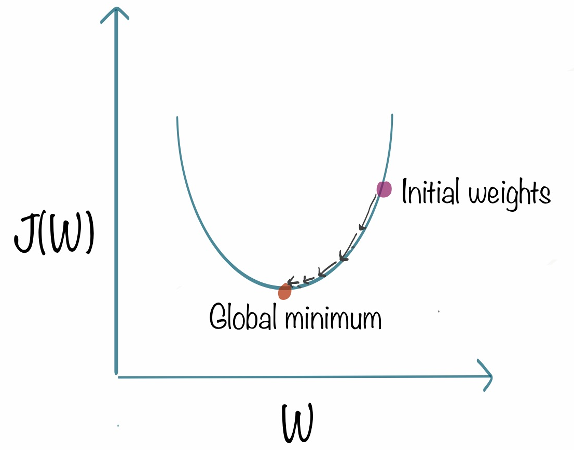


### Other Well-Known Optimizers


*   Stochastic Gradient Descent
*   Stochastic Gradient Descent With Momentum
*   Mini Batch Gradient Descent
*   Adagrad (Adaptive Gradient Descent)
*   RMS Prop (Root Mean Square)
*   Adaptive Moment Estimation <- MOST IMPORTANT
  * The name “Adam” is derived from “adaptive moment estimation,” highlighting its ability to adaptively adjust the learning rate for each network weight individually. Adam optimizer dynamically computes individual learning rates based on the past gradients and their second moments.
  * By incorporating both the first moment (mean) and second moment (uncentered variance) of the gradients, Adam optimizer achieves an adaptive learning rate that can efficiently navigate the optimization landscape during training. This adaptivity helps in faster convergence and improved performance of the neural network.



Optimizers Homework:

What is chain rule of differentiation?

We will learn more about Optimizers tomorrow.